LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df = pd.read_csv("C:\\Users\\Vandana Krishna\\Downloads\EDA\\zomato.csv") 
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
#Finding out the missing values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
#Checking which all variables have missing values
[features for features in df.columns if df[features].isnull().sum()>0]

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

<AxesSubplot:>

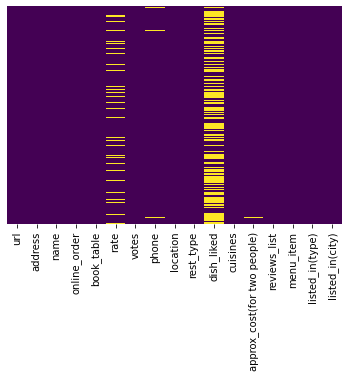

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar= False, cmap='viridis' )

Text(0.5, 1.0, 'Null Values')

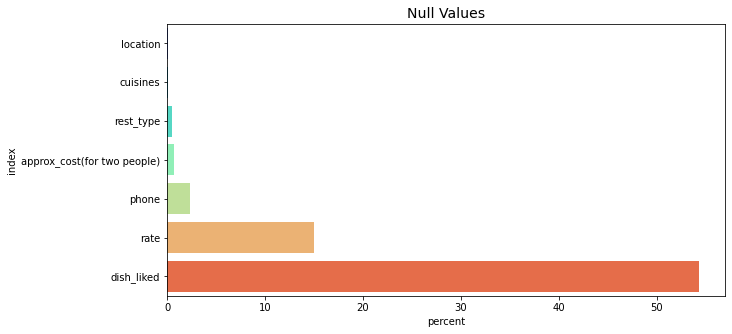

In [10]:
data = df.isna().sum()
data = data[data>0].sort_values()
data = data.reset_index()
data['percent'] = round((data[0]/df.shape[0])*100, 3)
fig = plt.figure(figsize = (10, 5))  
sns.barplot(x='percent', y='index', data=data, palette='rainbow') 
plt.title("Null Values", fontsize=14)

"dish_liked" is the column with highest number of null values, more than 50 % followed by "rate" column. It wouldn't make sense to keep "dish_liked" column in case you are planning to build a recommendation system but since we are only focused on EDA in the project, and since the aim is to analyze the most liked dish, let it be.

DATA CLEANING:
This process involves:
 *Deleting the redundant columns
 *Renaming columns(if required)
 *Dropping the duplicates
 *Cleaning individual columns before being fed into the model
 *Removing NaN values from the dataset

In [11]:
df = df.drop(['url','online_order','address', 'book_table','phone','reviews_list','menu_item','listed_in(type)'],axis=1)
df

,name,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,Jalsa,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,Grand Village,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari
...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",Whitefield
51713,Vinod Bar And Restaurant,NaN,0,Whitefield,Bar,NaN,Finger Food,600,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Whitefield


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   rate                         43942 non-null  object
 2   votes                        51717 non-null  int64 
 3   location                     51696 non-null  object
 4   rest_type                    51490 non-null  object
 5   dish_liked                   23639 non-null  object
 6   cuisines                     51672 non-null  object
 7   approx_cost(for two people)  51371 non-null  object
 8   listed_in(city)              51717 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.6+ MB


Text(0.5, 0, 'Number of outlets')

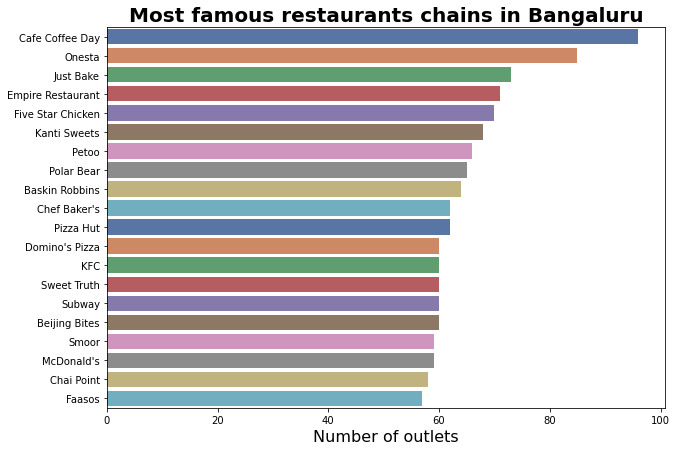

In [13]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru",fontsize =20, weight = 'bold')
plt.xlabel("Number of outlets",fontsize =16)

In [14]:
df.drop_duplicates(inplace=True) #Removing the duplicate values
df.shape

(36248, 9)

Cleaning the rate column:

In [15]:
df['rate'].unique() #Checking unique values in the rate column

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [16]:
def ratehandle(value):
    if(value == 'NEW' or value =='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
df['rate'] = df['rate'].apply(ratehandle)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [17]:
df.head(10)

,name,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,Jalsa,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari
5,Timepass Dinner,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,3.6,8,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,Banashankari
7,Onesta,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,Banashankari
8,Penthouse Cafe,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,Banashankari
9,Smacznego,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,Banashankari


In [18]:
#Checking the total number of nan values in rate column
df.rate.isnull().sum()

7387

Text(0, 0.5, 'count')

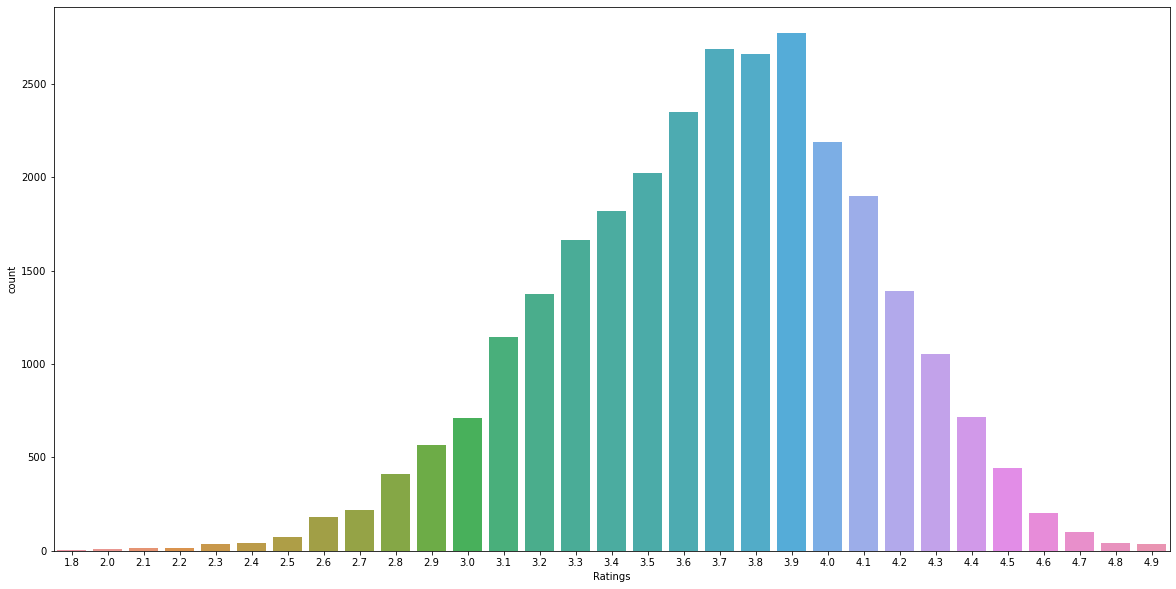

In [19]:
plt.figure(figsize=(20,10))
rating=df['rate'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

In [20]:
#Filling Null Values in Rate Column with Mean
df['rate'].fillna(df['rate'].mean(), inplace = True) 
df['rate'].isnull().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36248 entries, 0 to 51714
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         36248 non-null  object 
 1   rate                         36248 non-null  float64
 2   votes                        36248 non-null  int64  
 3   location                     36231 non-null  object 
 4   rest_type                    36093 non-null  object 
 5   dish_liked                   15750 non-null  object 
 6   cuisines                     36208 non-null  object 
 7   approx_cost(for two people)  36007 non-null  object 
 8   listed_in(city)              36248 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.8+ MB


In [22]:
#Dropping Null Values
df.dropna(inplace = True)
df.head()

,name,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,Jalsa,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari


In [23]:
df.rename(columns = {'approx_cost(for two people)': 'Cost_2_plates','listed_in(type)': 'Type'}, inplace = True)
df.head()

,name,rate,votes,location,rest_type,dish_liked,cuisines,Cost_2_plates,listed_in(city)
0,Jalsa,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Banashankari
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Banashankari


In [24]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Jayanagar', 'Kumaraswamy Layout',
       'Rajarajeshwari Nagar', 'Mysore Road', 'Uttarahalli',
       'South Bangalore', 'Vijay Nagar', 'Bannerghatta Road', 'JP Nagar',
       'BTM', 'Wilson Garden', 'Koramangala 5th Block', 'Shanti Nagar',
       'Richmond Road', 'City Market', 'Bellandur', 'Sarjapur Road',
       'Marathahalli', 'HSR', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'East Bangalore', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road', 'Domlur',
       'Koramangala 8th Block', 'Frazer Town', 'Ejipura', 'Vasanth Nagar',
       'Jeevan Bhima Nagar', 'Old Madras Road', 'Commercial Street',
       'Koramangala 6th Block', 'Majestic', 'Langford Town',
       'Koramangala 7th Block', 'Brookefield', 'Whitefield',
       'ITPL Main Road, Whitefield', 'Varthur Main Road, Whi

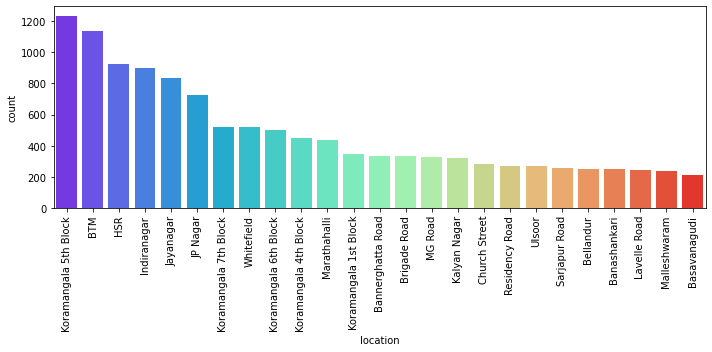

In [25]:
#Finding out the greatest number of restaurants are situated in which locality of Bangalore.
df = df[~df['location'].isnull()]
location_grp = df.groupby(['location']).agg(['count'])['name'].reset_index()
location_grp.sort_values(by="count", inplace=True, ascending=False)
fig = plt.figure(figsize = (10, 5))  
sns.barplot(x="location", y="count", data=location_grp[:25], palette='rainbow')
plt.xticks(rotation=90)
plt.tight_layout()

As we may see above most of our restaurants are from "Koramangala 5th Block" location which is closely followed by BTM and HSR (across different blocks).

In [26]:
df=df.drop(['listed_in(city)'],axis=1)
df.head()

,name,rate,votes,location,rest_type,dish_liked,cuisines,Cost_2_plates
0,Jalsa,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800
2,San Churro Cafe,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600


In [27]:
df['Cost_2_plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [28]:
#To clean the cost_2_plates column

def commahandle(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['Cost_2_plates'] = df['Cost_2_plates'].apply(commahandle)
df['Cost_2_plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [29]:
df.head()

,name,rate,votes,location,rest_type,dish_liked,cuisines,Cost_2_plates
0,Jalsa,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0
2,San Churro Cafe,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0


In [30]:
#cleaning the rest-type column
df['rest_type'].value_counts()

Casual Dining                5044
Quick Bites                  3940
Cafe                         1289
Dessert Parlor                763
Delivery                      683
                             ... 
Bar, Lounge                     3
Dessert Parlor, Kiosk           2
Club, Casual Dining             2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [31]:
rest_types = df['rest_type'].value_counts(ascending = False)
rest_types

Casual Dining                5044
Quick Bites                  3940
Cafe                         1289
Dessert Parlor                763
Delivery                      683
                             ... 
Bar, Lounge                     3
Dessert Parlor, Kiosk           2
Club, Casual Dining             2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [32]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Dessert Parlor               763
Delivery                     683
Casual Dining, Bar           510
Takeaway, Delivery           325
Fine Dining                  244
                            ... 
Bar, Lounge                    3
Dessert Parlor, Kiosk          2
Club, Casual Dining            2
Dhaba                          1
Food Court, Casual Dining      1
Name: rest_type, Length: 70, dtype: int64

In [33]:
#Making Rest Types less than 1000 in frequency as others
def resttypehandle(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
    
df['rest_type'] = df['rest_type'].apply(resttypehandle)
df['rest_type'].value_counts()

others           5357
Casual Dining    5044
Quick Bites      3940
Cafe             1289
Name: rest_type, dtype: int64

In [34]:
df.head()

,name,rate,votes,location,rest_type,dish_liked,cuisines,Cost_2_plates
0,Jalsa,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0
1,Spice Elephant,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0
2,San Churro Cafe,3.8,918,Banashankari,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0
4,Grand Village,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0


In [35]:
df['location'].value_counts()

Koramangala 5th Block    1233
BTM                      1135
HSR                       922
Indiranagar               896
Jayanagar                 835
                         ... 
Kanakapura Road             2
Jalahalli                   2
Yelahanka                   1
Magadi Road                 1
KR Puram                    1
Name: location, Length: 88, dtype: int64

In [36]:
location = df['location'].value_counts(ascending = False)

location_lessthan500 = location[location < 500]

def locationhandle(value):
    if (value in location_lessthan500):
        return 'others'
    else:
        return value
    
df['location'] = df['location'].apply(locationhandle)
df['location'].value_counts()

others                   8341
Koramangala 5th Block    1233
BTM                      1135
HSR                       922
Indiranagar               896
Jayanagar                 835
JP Nagar                  725
Koramangala 7th Block     522
Whitefield                521
Koramangala 6th Block     500
Name: location, dtype: int64

In [37]:

df['cuisines'].value_counts()

North Indian                           814
North Indian, Chinese                  521
South Indian                           307
South Indian, North Indian, Chinese    178
Cafe                                   163
                                      ... 
North Indian, Rolls, Kebab               1
North Indian, Andhra, Chinese            1
North Indian, Street Food, Chinese       1
French, Sandwich, Salad                  1
Thai, Chinese, Momos                     1
Name: cuisines, Length: 1691, dtype: int64

FIGURING OUT THE MOST POPULAR CUISINES OF BANGALORE

C:\Users\Vandana Krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

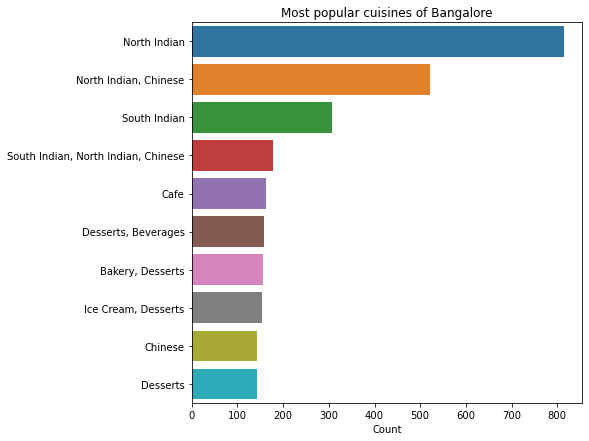

In [38]:
plt.figure(figsize=(7,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

In [39]:
cuisines = df['cuisines'].value_counts(ascending = False)

cuisine_lessthan100 = cuisines[cuisines < 100]

def cuisinehandle(value):
    if (value in cuisine_lessthan100):
        return 'others'
    else:
        return value
    
df['cuisines'] = df['cuisines'].apply(cuisinehandle)
df['cuisines'].value_counts()

others                                 12320
North Indian                             814
North Indian, Chinese                    521
South Indian                             307
South Indian, North Indian, Chinese      178
Cafe                                     163
Desserts, Beverages                      159
Bakery, Desserts                         157
Ice Cream, Desserts                      153
Chinese                                  143
Desserts                                 142
Biryani                                  135
Fast Food                                116
Chinese, Momos                           110
Burger, Fast Food                        106
North Indian, Chinese, Biryani           106
Name: cuisines, dtype: int64

In [40]:
df.head()

,name,rate,votes,location,rest_type,dish_liked,cuisines,Cost_2_plates
0,Jalsa,4.1,775,others,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",others,800.0
1,Spice Elephant,4.1,787,others,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",others,800.0
2,San Churro Cafe,3.8,918,others,others,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",others,800.0
3,Addhuri Udupi Bhojana,3.7,88,others,Quick Bites,Masala Dosa,others,300.0
4,Grand Village,3.8,166,others,Casual Dining,"Panipuri, Gol Gappe",others,600.0


In [41]:
df['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [42]:
#Mean of all columns
df.mean()

C:\Users\VANDAN~1\AppData\Local\Temp/ipykernel_27516/2125232233.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


rate               3.895714
votes            567.274088
Cost_2_plates    717.971209
dtype: float64

In [43]:
df.max()

name                  re:cess - Hilton Bangalore Embassy GolfLinks
rate                                                           4.9
votes                                                        16832
location                                                    others
rest_type                                                   others
dish_liked       Zinger Burger, Hot Wings, Chicken Wings, Crisp...
cuisines                                                    others
Cost_2_plates                                               6000.0
dtype: object

In [44]:
df.min()

name                                                    #L-81 Cafe
rate                                                           1.8
votes                                                            0
location                                                       BTM
rest_type                                                     Cafe
dish_liked       Aam Panna, Pasta, Biryani, Paneer Tikka, Chine...
cuisines                                          Bakery, Desserts
Cost_2_plates                                                 40.0
dtype: object

In [45]:
df.median()

C:\Users\VANDAN~1\AppData\Local\Temp/ipykernel_27516/530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


rate               3.9
votes            216.0
Cost_2_plates    600.0
dtype: float64

In [46]:
df.std()

C:\Users\VANDAN~1\AppData\Local\Temp/ipykernel_27516/3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


rate                0.424928
votes            1055.563951
Cost_2_plates     518.083788
dtype: float64

In [47]:
df.var()

C:\Users\VANDAN~1\AppData\Local\Temp/ipykernel_27516/1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


rate             1.805641e-01
votes            1.114215e+06
Cost_2_plates    2.684108e+05
dtype: float64

In [48]:
#Lower Quartile / First Quartile
df.quantile(0.25)

rate               3.7
votes            100.0
Cost_2_plates    400.0
Name: 0.25, dtype: float64

In [49]:
#Second Quartile / Median
df.quantile(0.50)

rate               3.9
votes            216.0
Cost_2_plates    600.0
Name: 0.5, dtype: float64

In [50]:
# Upper Quartile
df.quantile(0.75)

rate               4.2
votes            552.0
Cost_2_plates    850.0
Name: 0.75, dtype: float64

In [51]:
#IQR (Interquartile Range)
df.quantile(0.75) - df.quantile(0.25)

rate               0.5
votes            452.0
Cost_2_plates    450.0
dtype: float64

In [52]:
# Sum of column values
df.sum()

name             JalsaSpice ElephantSan Churro CafeAddhuri Udup...
rate                                                   60890.00764
votes                                                      8866494
location         othersothersothersothersothersothersothersothe...
rest_type        Casual DiningCasual DiningothersQuick BitesCas...
dish_liked       Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
cuisines         othersothersothersothersothersNorth Indianothe...
Cost_2_plates                                           11221890.0
dtype: object

In [53]:
#Return unbiased skew
df.skew()

C:\Users\VANDAN~1\AppData\Local\Temp/ipykernel_27516/125714599.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


rate            -1.205736
votes            5.510352
Cost_2_plates    2.305847
dtype: float64

In [54]:
# Return unbiased kurtosis using Fisher’s definition of kurtosis
df.kurt()

C:\Users\VANDAN~1\AppData\Local\Temp/ipykernel_27516/3281425626.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


rate              2.256455
votes            46.669104
Cost_2_plates     8.284229
dtype: float64

In [55]:
#Correlation
df.corr()

,rate,votes,Cost_2_plates
rate,1.000000,0.375052,0.302344
votes,0.375052,1.000000,0.309048
Cost_2_plates,0.302344,0.309048,1.000000


In [56]:
#Covariance
df.cov()

,rate,votes,Cost_2_plates
rate,0.180564,1.682253e+02,66.560504
votes,168.225321,1.114215e+06,169009.380084
Cost_2_plates,66.560504,1.690094e+05,268410.811123


C:\Users\Vandana Krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='location'>

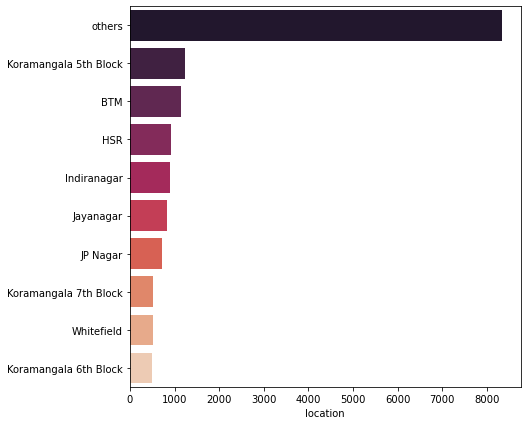

In [57]:
#Finding the foodie areas of Bangalore
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

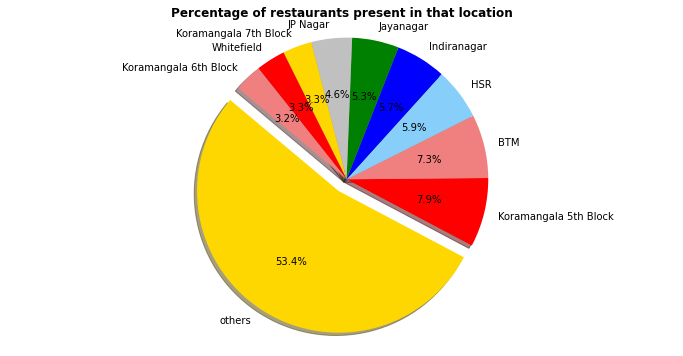

In [58]:
plt.figure(figsize = (12,6))
names = df['location'].value_counts()[:10].index
values = df['location'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

C:\Users\Vandana Krishna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'others'),
  Text(1, 0, 'North Indian'),
  Text(2, 0, 'Cafe'),
  Text(3, 0, 'Biryani'),
  Text(4, 0, 'Burger, Fast Food'),
  Text(5, 0, 'North Indian, Chinese'),
  Text(6, 0, 'Ice Cream, Desserts'),
  Text(7, 0, 'South Indian'),
  Text(8, 0, 'South Indian, North Indian, Chinese'),
  Text(9, 0, 'Fast Food'),
  Text(10, 0, 'Chinese'),
  Text(11, 0, 'Desserts, Beverages'),
  Text(12, 0, 'Chinese, Momos'),
  Text(13, 0, 'Desserts'),
  Text(14, 0, 'North Indian, Chinese, Biryani'),
  Text(15, 0, 'Bakery, Desserts')])

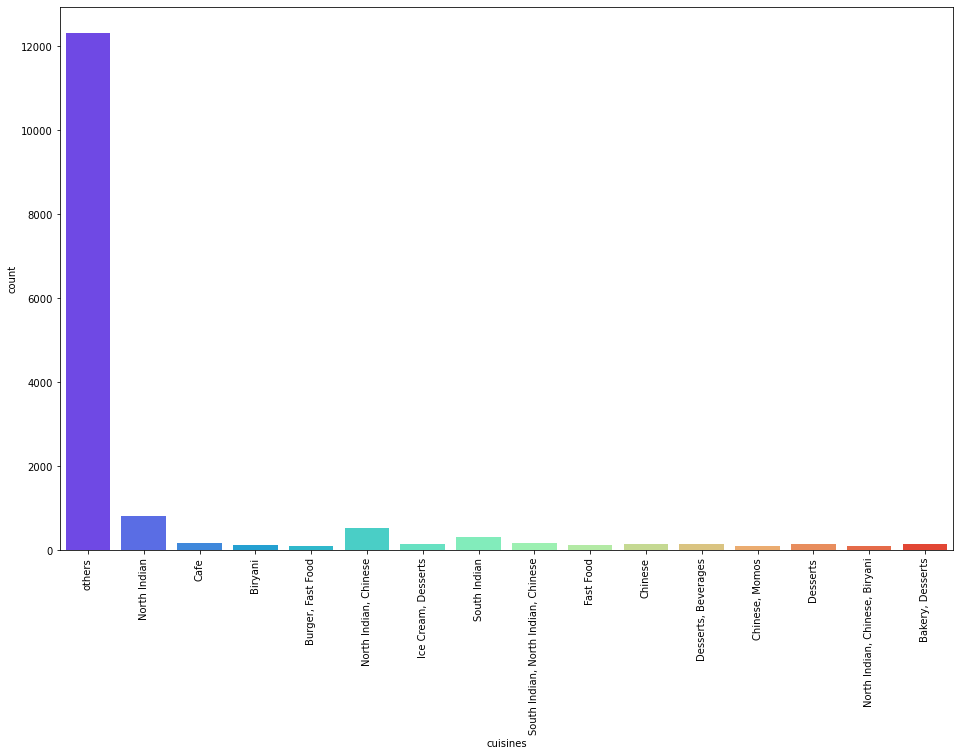

In [59]:
#Visualizing the top cuisines
plt.figure(figsize =(16,10))
ax = sns.countplot(df['cuisines'], palette = 'rainbow')
plt.xticks(rotation =90)

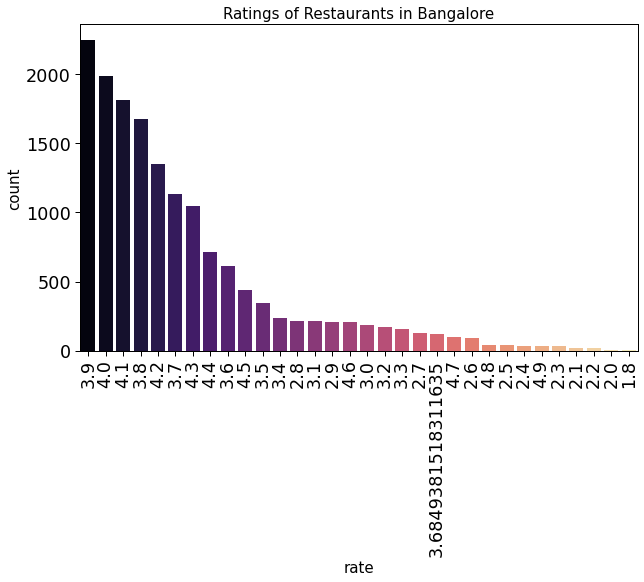

In [60]:
sns.set_context('paper',font_scale=2,rc={'font.size':15,'axes.titlesize':15,'axes.labelsize':15})
plt.figure(figsize=(10,6))
b=sns.countplot(x='rate',data=df,palette='magma',order=df['rate'].value_counts().index)
plt.title('Ratings of Restaurants in Bangalore')
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

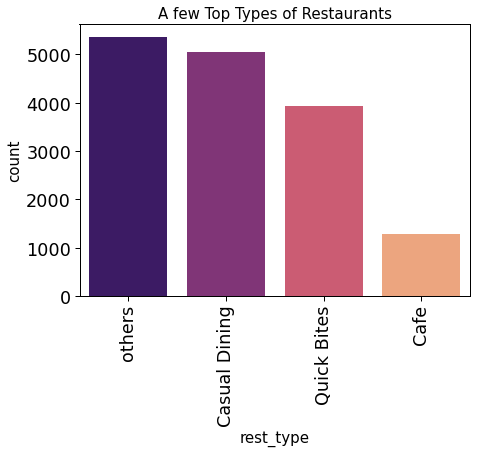

In [61]:
plt.figure(figsize=(7,5))
sns.set_context('paper',font_scale=2,rc={'font.size':10 ,'axes.titlesize':15,'axes.labelsize':15})
plt.title('A few Top Types of Restaurants')
b=sns.countplot(x='rest_type',data=df,palette='magma',order=df['rest_type'].value_counts().head(10).index)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.show()

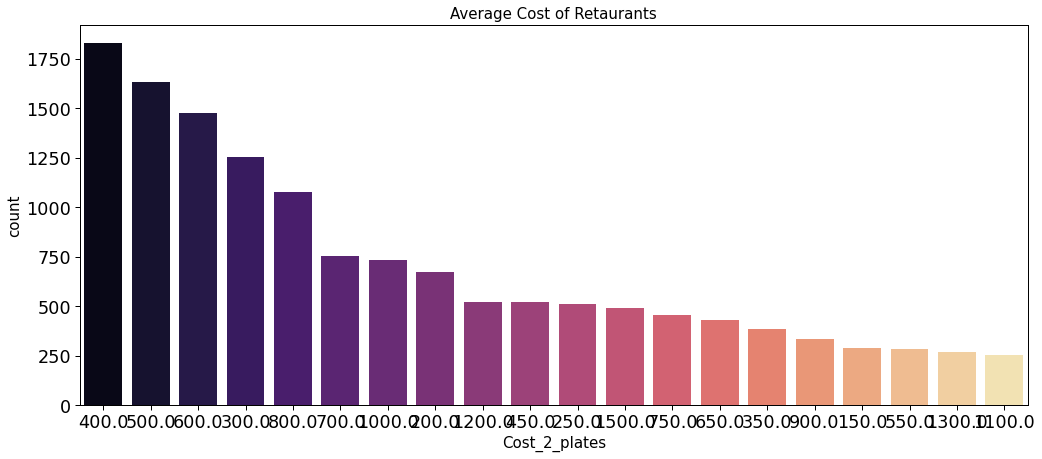

In [63]:
plt.figure(figsize=(17,7))
sns.set_context('paper',font_scale=2,rc={'font.size':10 ,'axes.titlesize':15,'axes.labelsize':15})
b=sns.countplot(x='Cost_2_plates',data=df,palette='magma',order=df['Cost_2_plates'].value_counts().head(20).index)
plt.title('Average Cost of Retaurants')
plt.show()

In [64]:
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i, 6] == 'Friendly Staff' or a[i,6]=='Rooftop Ambience':
        a[i, 6] = None
a = pd.DataFrame(a)
a.columns = df.columns

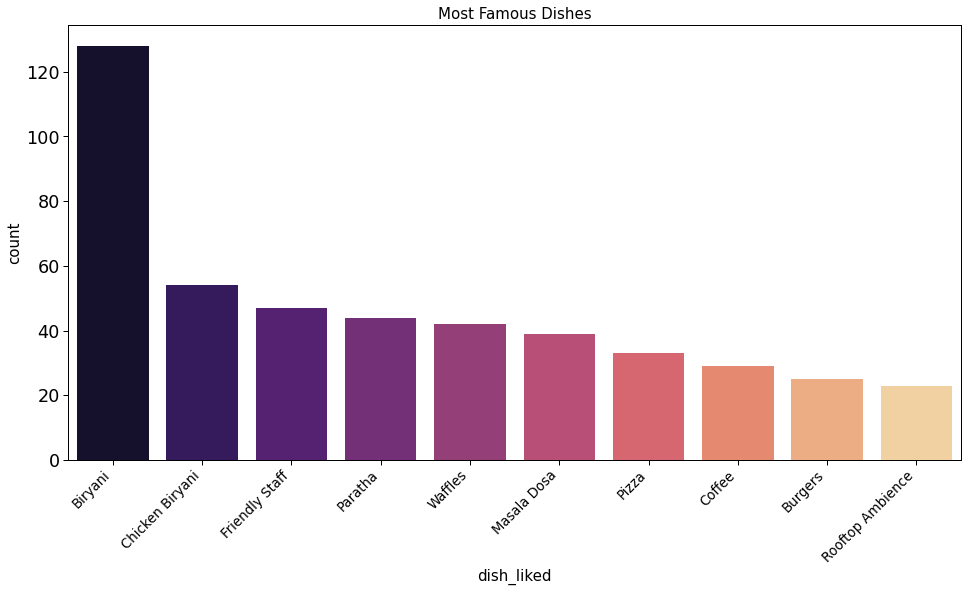

In [65]:
# plotting the top 10 dishes liked by people 
plt.figure(figsize=(16,8))
sns.countplot(x='dish_liked',data=a,palette='magma',order=a['dish_liked'].value_counts().head(10).index)
sns.set_context('paper',font_scale=2,rc={'fontsize':15,'axes.titlesize':15,'axes.labelsize':15})
plt.title('Most Famous Dishes')
plt.xticks(rotation=45,horizontalalignment='right',
        fontweight='light',
        fontsize='x-small')
plt.show()

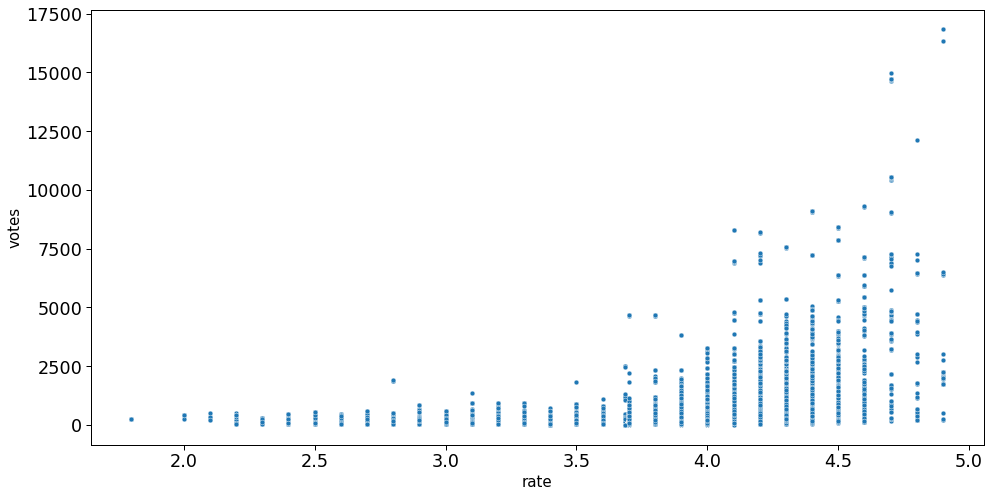

In [66]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='rate',y='votes',data=df)
plt.show()

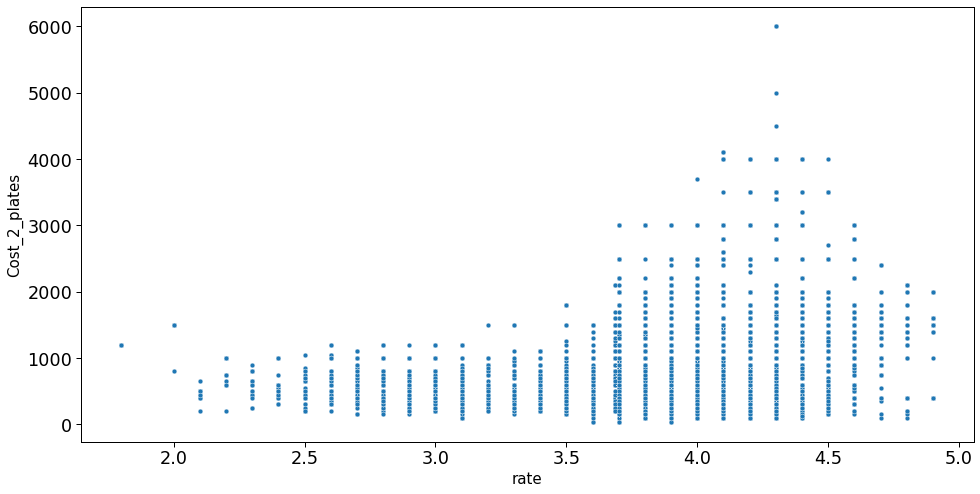

In [67]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='rate',y='Cost_2_plates',data=df)
plt.show()